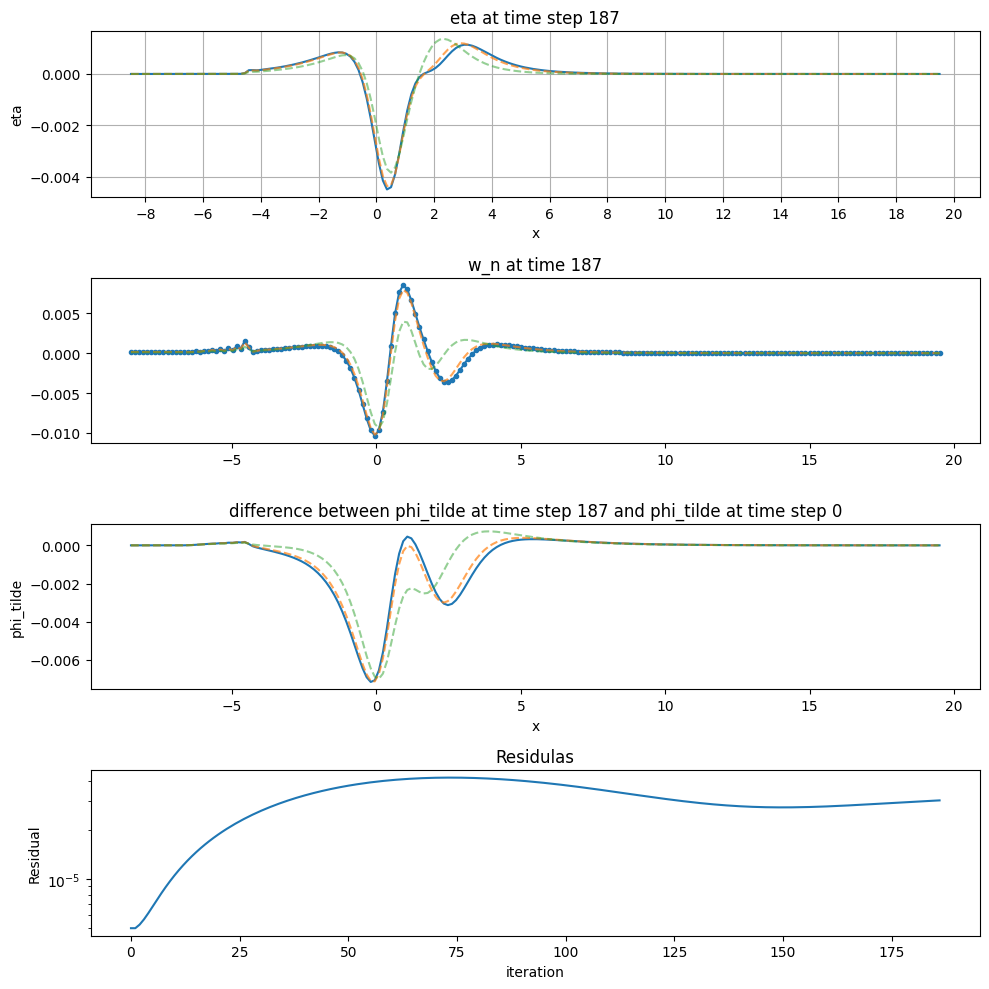

In [55]:
import matplotlib.pyplot as plt
import numpy as np

eta = np.load("./arrays/eta.npy")
phi = np.load("./arrays/phiTilde.npy")
fs_xs = np.load("./arrays/coordsFS.npy")
wn = np.load("./arrays/ws.npy")

# sorter informationen i alle numpy arrays
idx = np.argsort(fs_xs, axis=1)
eta = np.take_along_axis(eta, idx, axis=1)
phi = np.take_along_axis(phi, idx, axis=1)
fs_xs = np.take_along_axis(fs_xs, idx, axis=1)
wn = np.take_along_axis(wn, idx,axis = 1)

residuals = np.load("./arrays/residuals.npy")
residuals, time_step = residuals[:,0], residuals[:,1]

fig, ax = plt.subplots(4, 1, figsize = (10,10))
time = np.where(time_step == 0)[0][0] - 1
try:
    time = np.where(time_step == 0)[0][0] - 1
except:
    time = len(time_step) - 1

#time = 0
height_of_FS = eta[0][0]
ax[0].plot(fs_xs[time][:], eta[time][:]-height_of_FS)
if time - 50 > 0:
    ax[0].plot(fs_xs[time-10][:], eta[time-10][:] - height_of_FS, alpha = 0.7, linestyle = "--")
    ax[0].plot(fs_xs[time-50][:], eta[time-50][:] - height_of_FS, alpha = 0.5, linestyle = "--")

ax[0].set_title(f"eta at time step {time}" )
ax[0].set_xlabel("x")
ax[0].set_ylabel("eta")
ax[0].set_xticks(np.arange(int(fs_xs[0].min()), fs_xs[0].max()+1, 2))
ax[0].grid()

ax[1].plot(fs_xs[time][:], wn[time][:], marker='.')
ax[1].set_title(f"w_n at time {time}")
if time - 50 > 0:
    ax[1].plot(fs_xs[time-10][:], wn[time-10][:], alpha = 0.7, linestyle = "--")
    ax[1].plot(fs_xs[time-50][:], wn[time-50][:], alpha = 0.5, linestyle = "--")

init_phi = phi[0]
ax[2].plot(fs_xs[0], phi[time]-init_phi)
if time - 50 > 0:
    ax[2].plot(fs_xs[0], phi[time-10]-init_phi, alpha = 0.7, linestyle = "--")
    ax[2].plot(fs_xs[0], phi[time-50]-init_phi, alpha = 0.5, linestyle = "--")
ax[2].set_title(f"difference between phi_tilde at time step {time} and phi_tilde at time step 0" )
# ax[2].set_title(f"phi_tilde flattened at time step {time}")
ax[2].set_xlabel("x")
ax[2].set_ylabel("phi_tilde")
# ax[2].set_xlim(-3,0)


if time >0:
    residuals[0] = residuals[1]
ax[3].plot(residuals[:time])
ax[3].set_title("Residulas")
ax[3].set_xlabel("iteration")
ax[3].set_ylabel("Residual")
ax[3].set_yscale("log")

plt.tight_layout()
plt.show()